In [1]:
import numpy as np
import pandas as pd
from statistics import mean
from statistics import pstdev
from scipy import stats
import csv
import re
import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.linear_model import LinearRegression

In [2]:
mutability_scores = pd.read_excel(io='Spencer_et_al_2017_Cas9_mutagenesis.xlsx',
                   sheet_name='Mutability Scores')

mutability_scores_list = mutability_scores['Mutability Score'].tolist()
mean_mutability_score = mean(mutability_scores_list)
stdev_mutability_score = pstdev(mutability_scores_list)

for index, row in mutability_scores.iterrows():
    normalized_mutability_score = (row[1] - mean_mutability_score)/stdev_mutability_score
    mutability_scores = mutability_scores.replace(row[1], normalized_mutability_score)

In [3]:
df1 = pd.read_excel(io='Spencer_et_al_2017_Cas9_mutagenesis.xlsx',
                   sheet_name='All Count Data')

df1.drop_duplicates(subset=['AA Position'], inplace=True)

s1 = pd.Series(df1['AA Position'], name='AA Position')
s2 = pd.Series(df1['Domain'], name='Domain')

aa_domains = pd.concat([s1,s2], axis=1)

In [4]:
aa_domains_mutability = pd.merge(aa_domains, mutability_scores, on=['AA Position'])

aa_domains_mutability = aa_domains_mutability.dropna()

aa_domains_mutability.to_excel('AminoAcids_Domains_Mutability.xlsx')

In [64]:
with open('FinalSum_Cas9RNP') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter='\t')
    aa_network_scores = pd.DataFrame(csv_reader, columns=['AA Position','Network Score'])

aa_network_scores = aa_network_scores[aa_network_scores['Network Score'] != 'NA']

aa_network_scores['Network Score'] = aa_network_scores['Network Score'].astype(float)
aa_network_scores = aa_network_scores.sort_values(by=['Network Score'])

for aa in aa_network_scores['AA Position']:
    aa_new = int(re.sub('\D', '', aa))
    aa_network_scores = aa_network_scores.replace(to_replace=aa, value=aa_new)


aa_network_scores = aa_network_scores.sort_values(by=['AA Position'])

aa_network_scores.to_excel('AminoAcids_NetworkScores.xlsx')

In [65]:
aa_domains_network_mutability = pd.merge(aa_network_scores, aa_domains_mutability, on=['AA Position'])
columns_swap = ['AA Position','Domain','Network Score','Mutability Score']
aa_domains_network_mutability=aa_domains_network_mutability.reindex(columns=columns_swap)

aa_domains_network_mutability.to_excel('Mutability_NetworkScores.xlsx')

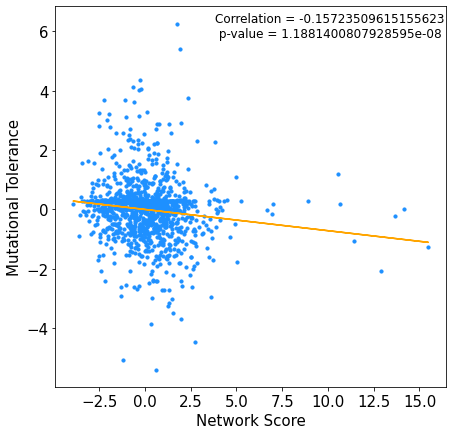

In [66]:
fig = plt.figure(figsize = (7,7))
x_vals = aa_domains_network_mutability.loc[:,'Network Score']
y_vals = aa_domains_network_mutability.loc[:,'Mutability Score']
plt.scatter(x_vals, y_vals, s=10, color='dodgerblue')
m, b = np.polyfit(x_vals, y_vals, 1)
plt.plot(x_vals, m*x_vals + b, color='orange')
plt.xlabel('Network Score', fontsize = 15)
plt.ylabel('Mutational Tolerance', fontsize = 15)
#plt.title('Structural Network Analysis of Cas9 Mutational Tolerance', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

model_x = np.array(x_vals).reshape((-1,1))
model_y = np.array(y_vals)
correlation, pvalue = stats.spearmanr(model_x, model_y)
fig_text = 'Correlation = {} \n p-value = {}'.format(correlation,pvalue)
plt.text(3.8,5.8, fig_text, fontsize = 12)
plt.show()

In [67]:
def domain_scorer(df, domain_name):
    rows = df[df['Domain'].str.contains(domain_name)]
    x_vals = rows.loc[:,'Network Score']
    y_vals = rows.loc[:,'Mutability Score']
    
    return x_vals, y_vals

In [68]:
RuvC_x_vals, RuvC_y_vals = domain_scorer(aa_domains_network_mutability, 'RuvC')
BH_x_vals, BH_y_vals = domain_scorer(aa_domains_network_mutability, 'BH')
Rec1_x_vals, Rec1_y_vals = domain_scorer(aa_domains_network_mutability, 'Rec1')
Rec2_x_vals, Rec2_y_vals = domain_scorer(aa_domains_network_mutability, 'Rec2')
HNH_x_vals, HNH_y_vals = domain_scorer(aa_domains_network_mutability, 'HNH')
PI_x_vals, PI_y_vals = domain_scorer(aa_domains_network_mutability, 'PI')

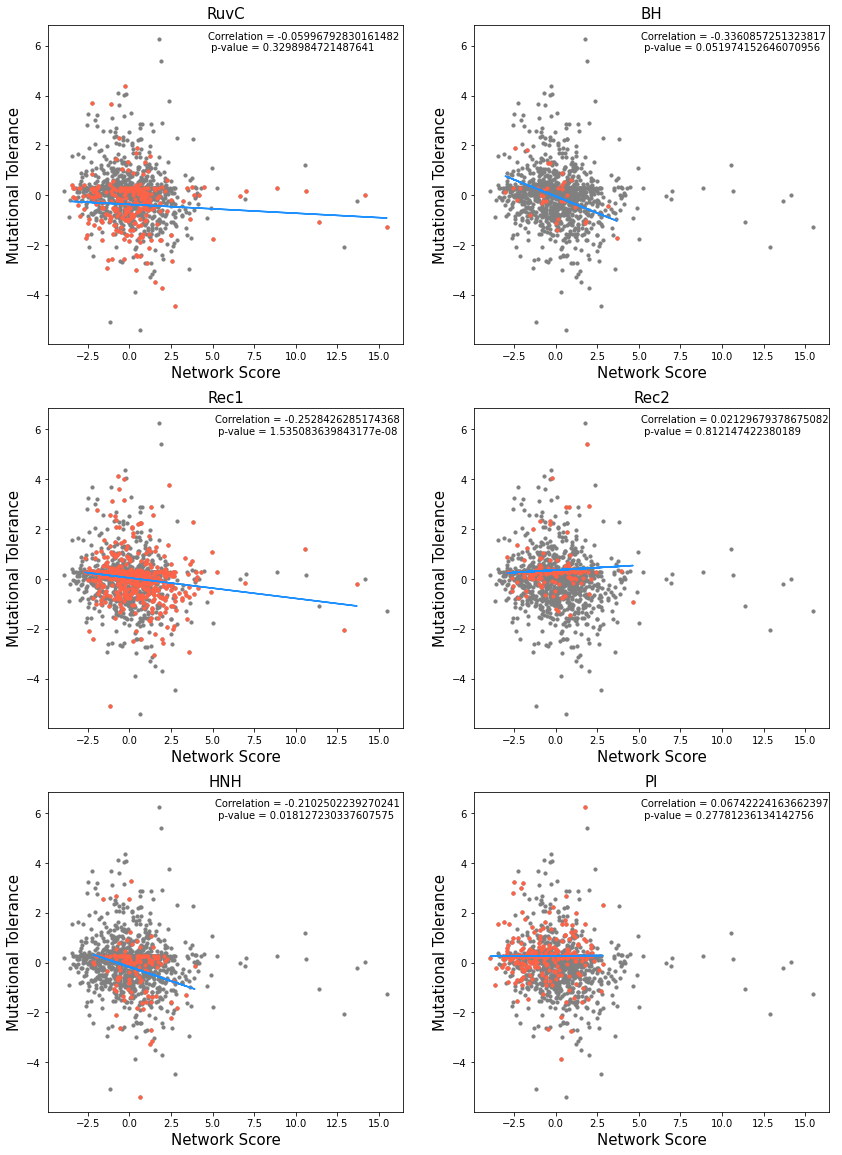

In [74]:
fig, axs = plt.subplots(3,2, figsize=(14,20))
axs[0,0].scatter(x_vals, y_vals, s=10, color='grey')
axs[0,0].scatter(RuvC_x_vals, RuvC_y_vals, s=10, color='tomato')
m, b = np.polyfit(RuvC_x_vals, RuvC_y_vals, 1)
axs[0,0].plot(RuvC_x_vals, m*RuvC_x_vals + b, color='dodgerblue')
axs[0,0].set_xlabel('Network Score', fontsize=15)
axs[0,0].set_ylabel('Mutational Tolerance', fontsize=15)
axs[0,0].set_title('RuvC', fontsize=15)

model_x = np.array(RuvC_x_vals).reshape((-1,1))
model_y = np.array(RuvC_y_vals)
correlation, pvalue = stats.spearmanr(model_x, model_y)
spearman_patch = mpatches.Patch(facecolor='None',
                                label='Correlation = {} \n p-value = {}'.
                                format(correlation,pvalue))
axs[0,0].legend(loc=[0.36,0.9], handles=[spearman_patch], frameon=False, fontsize=10)

axs[0,1].scatter(x_vals, y_vals, s=10, color='grey')
axs[0,1].scatter(BH_x_vals, BH_y_vals, s=10, color='tomato')
m, b = np.polyfit(BH_x_vals, BH_y_vals, 1)
axs[0,1].plot(BH_x_vals, m*BH_x_vals + b, color='dodgerblue')
axs[0,1].set_xlabel('Network Score', fontsize=15)
axs[0,1].set_ylabel('Mutational Tolerance', fontsize=15)
axs[0,1].set_title('BH', fontsize=15)

model_x = np.array(BH_x_vals).reshape((-1,1))
model_y = np.array(BH_y_vals)
correlation, pvalue = stats.spearmanr(model_x, model_y)
spearman_patch = mpatches.Patch(facecolor='None',
                                label='Correlation = {} \n p-value = {}'.format(correlation,pvalue))
axs[0,1].legend(loc=[0.38,0.9], handles=[spearman_patch], frameon=False, fontsize=10)

axs[1,0].scatter(x_vals, y_vals, s=10, color='grey')
axs[1,0].scatter(Rec1_x_vals, Rec1_y_vals, s=10, color='tomato')
m, b = np.polyfit(Rec1_x_vals, Rec1_y_vals, 1)
axs[1,0].plot(Rec1_x_vals, m*Rec1_x_vals + b, color='dodgerblue')
axs[1,0].set_xlabel('Network Score', fontsize=15)
axs[1,0].set_ylabel('Mutational Tolerance', fontsize=15)
axs[1,0].set_title('Rec1', fontsize=15)

model_x = np.array(Rec1_x_vals).reshape((-1,1))
model_y = np.array(Rec1_y_vals)
correlation, pvalue = stats.spearmanr(model_x, model_y)
spearman_patch = mpatches.Patch(facecolor='None',
                                label='Correlation = {} \n p-value = {}'.format(correlation,pvalue))
axs[1,0].legend(loc=[0.38,0.9], handles=[spearman_patch], frameon=False, fontsize=10)

axs[1,1].scatter(x_vals, y_vals, s=10, color='grey')
axs[1,1].scatter(Rec2_x_vals, Rec2_y_vals, s=10, color='tomato')
m, b = np.polyfit(Rec2_x_vals, Rec2_y_vals, 1)
axs[1,1].plot(Rec2_x_vals, m*Rec2_x_vals + b, color='dodgerblue')
axs[1,1].set_xlabel('Network Score', fontsize=15)
axs[1,1].set_ylabel('Mutational Tolerance', fontsize=15)
axs[1,1].set_title('Rec2', fontsize=15)

model_x = np.array(Rec2_x_vals).reshape((-1,1))
model_y = np.array(Rec2_y_vals)
correlation, pvalue = stats.spearmanr(model_x, model_y)
spearman_patch = mpatches.Patch(facecolor='None',
                                label='Correlation = {} \n p-value = {}'.format(correlation,pvalue))
axs[1,1].legend(loc=[0.38,0.9], handles=[spearman_patch], frameon=False, fontsize=10)

axs[2,0].scatter(x_vals, y_vals, s=10, color='grey')
axs[2,0].scatter(HNH_x_vals, HNH_y_vals, s=10, color='tomato')
m, b = np.polyfit(HNH_x_vals, HNH_y_vals, 1)
axs[2,0].plot(HNH_x_vals, m*HNH_x_vals + b, color='dodgerblue')
axs[2,0].set_xlabel('Network Score', fontsize=15)
axs[2,0].set_ylabel('Mutational Tolerance', fontsize=15)
axs[2,0].set_title('HNH', fontsize=15)

model_x = np.array(HNH_x_vals).reshape((-1,1))
model_y = np.array(HNH_y_vals)
correlation, pvalue = stats.spearmanr(model_x, model_y)
spearman_patch = mpatches.Patch(facecolor='None',
                                label='Correlation = {} \n p-value = {}'.format(correlation,pvalue))
axs[2,0].legend(loc=[0.38,0.9],handles=[spearman_patch], frameon=False, fontsize=10)


axs[2,1].scatter(x_vals, y_vals, s=10, color='grey')
axs[2,1].scatter(PI_x_vals, PI_y_vals, s=10, color='tomato')
m, b = np.polyfit(PI_x_vals, PI_y_vals, 1)
axs[2,1].plot(PI_x_vals, m*PI_x_vals + b, color='dodgerblue')
axs[2,1].set_xlabel('Network Score', fontsize=15)
axs[2,1].set_ylabel('Mutational Tolerance', fontsize=15)
axs[2,1].set_title('PI', fontsize=15)


model_x = np.array(PI_x_vals).reshape((-1,1))
model_y = np.array(PI_y_vals)
correlation, pvalue = stats.spearmanr(model_x, model_y)
spearman_patch = mpatches.Patch(facecolor='None',
                                label='Correlation = {} \n p-value = {}'.format(correlation,pvalue))
axs[2,1].legend(loc=[0.38,0.9], handles=[spearman_patch], frameon=False, fontsize=10)

plt.show()
fig.savefig('Structural Network Analysis by Domain.jpg', bbox_inches='tight')